# Problem 7


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

%matplotlib inline

## Reading the data

Reading the data
We use the pandas' `read_csv` method to read the data file into a pandas `DataFrame` and then partition the data into `test` and `train` datasets with a 25% test proportion.

In [46]:

from sklearn.model_selection import train_test_split

df = pd.read_csv('../Questions/Q7_Data/US Presidential Data.csv')
X = df.values[:, 1:]
y = df.values[:, 0]

X, XTest, y, yTest = train_test_split(X, y, test_size=0.25)

## Training 1-NN classifier
We use the `KNeighborsClassifier` from the `sklearn` package to train the model and then measure the error on it using the eculidian norm.


In [47]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN(n_neighbors=1)
model.fit(X, y)

predictions = model.predict(X)
error = np.linalg.norm(predictions - y)
print('Error for training set on 1-NN classifier: %f' % error)

Error for training set on 1-NN classifier: 0.000000


## Testing different Ks for K-NN
We use different Ks for the model (1, 3, ..., 99) to test the performance of the model on our train and test datasets.
Then we plot the errors to visualize the effect of K in the K-NN classifier on this dataset.
As shown in the plot, the training error increases as the K is increased but the test error is roughly the same, although it has some ups and downs.

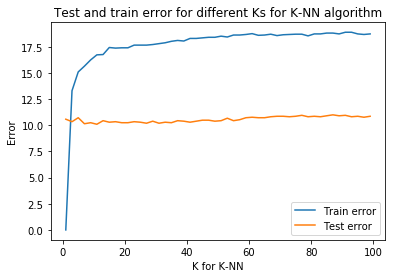

In [48]:
ks = [i for i in range(1, 100, 2)]

test_errors = []
train_errors = []
for k in ks:
    model = KNN(n_neighbors=k)
    model.fit(X, y)
    train_p = model.predict(X)
    test_p = model.predict(XTest)
    train_errors.append(np.linalg.norm(y - train_p))
    test_errors.append(np.linalg.norm(yTest - test_p))
    
plot.plot(ks, train_errors, label='Train error')
plot.plot(ks, test_errors, label='Test error')
plot.xlabel('K for K-NN')
plot.ylabel('Error')
plot.title('Test and train error for different Ks for K-NN algorithm')
plot.legend()
